<a href="https://colab.research.google.com/github/COMP90054/2024-S2-tutorials/blob/main/problem_set_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP90054 AI Planning for Autonomy
### Problem Set 04 - Modeling in STRIPS and PDDL


*Note- It is best to run this notebook on Colab(which runs an instance of linux), as the library requirements have been tested. As of now, we are aware of the issue that the `LAPKT`, Lighweight Automated Planning Toolkit, doesn't work on `macos`.*

## Key takeaways
- How to model a problem in STRIPS
- Understand the PDDL (Problem Domain Definition Language) syntax
- Describe the problem in PDDL
- How to use existing online/offline planners to solve a problem, using the PDDL description of the problem


## Recommended editors for PDDL

Fully featured editors for writing problem description in PDDL language.

- (Online) -  http://editor.planning.domains (Has integrateed solvers)
- (Local) - Install PDDL extension on VSCode (Extension Id: jan-dolejsi.pddl)


## Our recommended planners, which can solve a planning problem given the PDDL description of it


- (Online) -  Integrated planner on http://editor.planning.domains
- (Local) - Install `lapkt` package from `pypi` (Available for windows and linux)

We use the local version of `lapkt` in this notebook.

# Prepare the environment

In [ ]:
!pip install lapkt==0.0.2
!pip install func-timeout
from IPython.display import Latex
from func_timeout import func_timeout

# Load the default planner
from lapkt.load_planner import Planner

# BFWS Planner Configuration (State of the art Satisficing Planner)
config = {
          'log_file': {'var_name': 'log_filename', 'value': 'log.txt'},
          'plan_file': {'var_name': 'plan_filename', 'value': 'plan.ipc'}, # plan.ipc is the default output file for all planners
          'planner': {'value': 'BFWS'}, # Best First Width Search, ideas of BFWS will be explained in Week 6 Lecture(Iterated Width)
          'search_type': {'var_name': 'search', 'value': 'DUAL-BFWS'}, # configuration of BFWS
          'max_novelty': {'var_name': 'max_novelty', 'value': 2}, # configuration of BFWS
          'lapkt_instance_generator': {'value': 'Tarski'}, # We use tarski for parsing PDDL and grounding the lifted PDDL representation into propositional logic
          'domain': {'value': ''},
          'problem': {'value': ''},
          }

# BrFS Planner configuration (Optimal Planner)
config_BRFS = {
          'log_file': {'var_name': 'log_filename', 'value': 'log'},
          'plan_file': {'var_name': 'plan_filename', 'value': 'plan.ipc'},
          'planner': {'value': 'BRFS_Planner'},
          'lapkt_instance_generator': {'value': 'Tarski'},
          'domain': {'value': ''},
          'problem': {'value': ''},
        }

# Problem 1

Model Blocks-World as a STRIPS problem $P = \langle F, O, I, G \rangle$. You need to define the set of facts $F$ , the set of operators $O$, the goal facts $G$ and the initial facts $I$. You must also define the pre, add, and del functions.

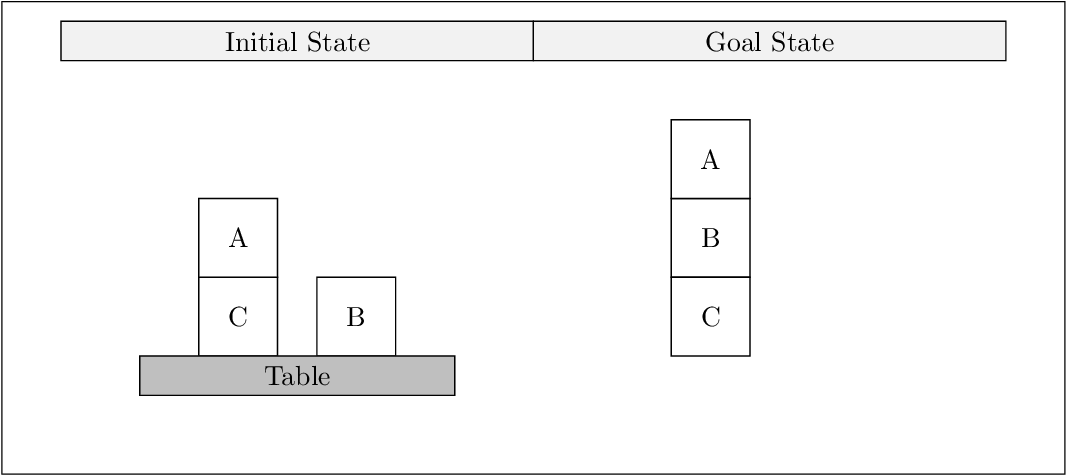

## Solution

$
F:=\{\}\\
\\
O:= \{\}\\
\\
I:=\{\}\\
\\
G:=\{\}
$


where, $B$ is the set of blocks


### For inspiration, use the following Australian TSP example.


It is also accessible in editor.planning.domains so you can try the solver on the cloud and edit the TSP.
https://editor.planning.domains/#read_session=opIzISuZ5W

Also. see http://www.hakank.org/pddl/ for more examples.


# Problem 2

Implement your STRIPS model in PDDL. Use http://editor.planning.domains to test your model. Remember that a PDDL implementation is split between two files: a domain file (also known as an “operator” file) and a problem file (also known as a “fact” file).


In [ ]:
tsp_domain="""
;; TSP PDDL ***Domain File***

    (define (domain tsp)
        (:requirements :typing)
        (:types node)

        ;; Define the facts in the problem
        ;; "?" denotes a variable, "-" a type
        (:predicates
            (at ?pos - node)
            (connected ?start ?end - node)
            (visited ?end - node)
        )

        ;; Define the action(s)
        (:action move
            :parameters (?start ?end - node)
            :precondition (and
                (at ?start)
                (connected ?start ?end)
            )
            :effect (and
                (at ?end)
                (visited ?end)
                (not (at ?start))
            )
        )
    )
"""

In [ ]:
tsp_problem="""
;; TSP PDDL ***Problem File***

    (define (problem tsp-01)
    (:domain tsp)
    (:objects Sydney Adelade Brisbane Perth Darwin - node)

    ;; Define the initial situation
    (:init  (connected Sydney Brisbane)
            (connected Brisbane Sydney)
            (connected Adelade Sydney)
            (connected Sydney Adelade)
            (connected Adelade Perth)
            (connected Perth Adelade)
            (connected Adelade Darwin)
            (connected Darwin Adelade)
            (at Sydney)
    )
    (:goal
            (and
                (at Sydney)
                (visited Sydney)
                (visited Adelade)
                (visited Brisbane)
                (visited Perth)
                (visited Darwin)
            )
    )
    )
"""

In [ ]:
# Create the PDDL domain file
with open("tsp_domain.pddl", 'w') as file:
  file.write(tsp_domain)

# Create the PDDL problem file
with open("tsp_problem.pddl", 'w') as file:
  file.write(tsp_problem)

# Set PDDL domain and problem file path in the planner configuration
config_BRFS['domain'] = {'value': 'tsp_domain.pddl'}
config_BRFS['problem'] = {'value': 'tsp_problem.pddl'}

planner_tsp = Planner(config_BRFS)
func_timeout(1, planner_tsp.solve, args=(), kwargs=None)

print("\nThe solution plan found by the planner is:\n")
with open("plan.ipc", 'r') as file:
  print(file.read())

# *Solution* - Fill the contents of the domain file and the problem file

In [ ]:
four_action_domain="""
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;;; 4 Op-blocks world
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

(define (domain BLOCKS)
  (:requirements :strips)
  (:predicates
		...
	)

  (:action pick-up
	     :parameters (?x)
	     :precondition (and ...)
	     :effect
	     (and
			 	...
			 )
	)

  (:action put-down
	     :parameters (?x)
	     :precondition (...)
	     :effect
	     (and
			 	...
			 )
	)
  (:action stack
	     :parameters (?x ?y)
	     :precondition (and ...)
	     :effect
	     (and
			 	...
			 )
	)
  (:action unstack
	     :parameters (?x ?y)
	     :precondition (...)
	     :effect
	     (and
			 ...
			 )
	)
)
"""

In [ ]:
four_action_problem="""
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;;; 4 Op-blocks world
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

(define (problem BLOCKS-example)
(:domain BLOCKS)
(:objects A B C)
(:INIT ...)
(:goal (AND ...))
)
"""

In [ ]:
# Create the PDDL domain file
with open("blocks_domain.pddl", 'w') as file:
  file.write(four_action_domain)

# Create the PDDL problem file
with open("blocks_problem.pddl", 'w') as file:
  file.write(four_action_problem)

# Set PDDL domain and problem file path in the planner configuration
config['domain'] = {'value': 'blocks_domain.pddl'}
config['problem'] = {'value': 'blocks_problem.pddl'}

# Note- The BFWS planner uses inadmissible heuristics. Hence, you may observe sub-optimnal plans.
planner = Planner(config)
func_timeout(10, planner.solve, args=(), kwargs=None)

print("\nThe solution plan found by the planner is:\n")
with open("plan.ipc", 'r') as file:
  print(file.read())

# Problem 3 (Challenge Problem)

Blockworld can be modeled with only 2 actions instead of 4. The robot can pick up a block and put it down on another block (or the table) in a single action.

You’ve got actions Move(Block,FromTable, ToBlock) and Move(Block, FromBlock, ToTable). You now no longer need to keep track of what the robot is holding or if the hand is empty.

Implement a STRIPS model of this “2-operation” blocks-world in PDDL.

# *Solution* - Fill the contents of the domain file and the problem file

In [ ]:
two_action_domain="""
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;;; 2 Op-blocks world
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

(define (domain ...)
  (:requirements :strips)

)
"""

In [ ]:
two_action_problem="""
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;;; 2 Op-blocks world
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

(define (problem ...)

)
"""

In [ ]:
# Create the PDDL domain file
with open("blocks_challenge_domain.pddl", 'w') as file:
  file.write(two_action_domain)

# Create the PDDL problem file
with open("blocks_challenge_problem.pddl", 'w') as file:
  file.write(two_action_problem)

# Set PDDL domain and problem file path in the planner configuration
config['domain'] = {'value': 'blocks_challenge_domain.pddl'}
config['problem'] = {'value': 'blocks_challenge_problem.pddl'}

# Note- The planner uses inadmissible heuristics. Hence, you may observe sub-optimnal plans
planner_2 = Planner(config)
func_timeout(10, planner_2.solve, args=(), kwargs=None)

print("\nThe solution plan found by the planner is:\n")
with open("plan.ipc", 'r') as file:
  print(file.read())

# Visualization Tool

## Planimation
This is just to aid understanding of the problem and visualize the plan. Watch Nir's video on PDDL to understand how it works.

Video - https://www.loom.com/share/203014b2444d4554b4466c4c9093501e
